# M2.P1. OpenMP


## Introduction to OpenMP

**OpenMP (Open Multi-Processing)** is an API that supports parallel programming in shared-memory environments. It simplifies the development of parallel applications by providing directives, library routines, and environment variables. 

### Key Goals of OpenMP
- Simplify parallel programming.
- Enable efficient use of multicore processors.
- Allow incremental parallelization of code.

### Applicability in Modern HPC
OpenMP is used in modern high-performance computing environments such as weather forecasting, scientific simulations, and data analysis. The key advantage is its ease of use with existing codebases in C, C++, and Fortran.




## Introduction to Parallel Programming with OpenMP

In this practice, we will explore the use of **OpenMP** (Open Multi-Processing), a widely-used API for parallel programming in C, C++, and Fortran. OpenMP provides a simple and flexible interface for developing parallel applications that can take advantage of multi-core and multi-threaded processors, which are common in modern computers.

### Why OpenMP?

OpenMP enables the parallelization of code, which can significantly speed up computational tasks by distributing the workload across multiple threads. This is particularly useful in tasks that are computationally intensive, such as simulations, data processing, and complex mathematical calculations.

### Using C Code and GCC Compiler

For this exercise, we will write and compile C code using the **GCC** (GNU Compiler Collection) compiler, which supports OpenMP directives. GCC is a powerful and versatile compiler that is widely used in the software development community.

### Running on Any Multithreaded System

The code we write can be executed on any computer that supports multithreading, including your local PC or cloud environments like Google Colab. If you're using Google Colab or any environment that might not have GCC installed by default, we will provide instructions to check if the GCC compiler is installed and install it if necessary.

### Checking and Installing GCC Compiler

Before we begin, we'll ensure that the GCC compiler is installed on your system. If it's not, the script will attempt to install it for you. This step is crucial to ensure that you can compile and run the C code with OpenMP support.

Let's proceed with checking the GCC compiler installation.


In [1]:
import os
import subprocess
import shutil

# Function to check if gcc is installed
def check_gcc_installed():
    return shutil.which("gcc") is not None

# Function to install gcc if not installed
def install_gcc():
    print("GCC is not installed. Attempting to install GCC...")
    install_command = "apt-get update && apt-get install -y gcc"
    install_process = subprocess.run(install_command, shell=True, capture_output=True, text=True)
    
    if install_process.returncode == 0:
        print("GCC installation successful.")
    else:
        print("GCC installation failed. Please install GCC manually.")
        print("Error details:", install_process.stderr)
        raise EnvironmentError("GCC installation failed.")

# Check if GCC is installed
if not check_gcc_installed():
    install_gcc()
else:
    print("GCC is already installed.")



GCC is already installed.




## Hello World OpenMP

Let's print the statement "Hello world!" using all the threads. Here the variable tid gives your thread id. Our server has only two threads. Threfore, the Hello world! will be printed twice.


### Example - Create your first OPenMP multithread program in C and compile it
In this case we will need to compile the C code. We have saved the following openmp code in the file /openmp/omp_hello.c

```
#include <omp.h>
#include <stdio.h>

int main(int argc, char *argv[]) {

 int nthreads, tid;

 /* Fork a team of threads with each thread having a private tid variable */
 #pragma omp parallel private(tid)
   {

   /* Obtain and print thread id */
   tid = omp_get_thread_num();
   printf("Hello World! from thread = %d\n", tid);

   /* Only master thread does this */
   if (tid == 0) 
     {
     nthreads = omp_get_num_threads();
     printf("Number of threads = %d\n", nthreads);
     }

   }  /* All threads join master thread and terminate */

 }
```

What we will do is to execute compile the code `gcc -o omp_helloc -fopenmp omp_hello.c`
Note that the environment variable OMP_NUM_THREADS was used to specify number of threads (2).
and we execute the code `./omp_helloc`



In [2]:
import os

# Define the path for the C program file
c_program_path = "hello_world_openmp.c"

# Remove the existing file if it exists
if os.path.exists(c_program_path):
    os.remove(c_program_path)

# Create and write the C program
c_program = """
#include <omp.h>
#include <stdio.h>

int main(int argc, char *argv[]) {

    int nthreads, tid;

    /* Fork a team of threads with each thread having a private tid variable */
    #pragma omp parallel private(tid)
    {

        /* Obtain and print thread id */
        tid = omp_get_thread_num();
        printf("Hello World! from thread = %d\\n", tid);

        /* Only master thread does this */
        if (tid == 0) 
        {
            nthreads = omp_get_num_threads();
            printf("Number of threads = %d\\n", nthreads);
        }

    }  /* All threads join master thread and terminate */

    return 0;
}
"""

# Write the C program to a file
with open(c_program_path, "w") as file:
    file.write(c_program)

print(f"C program written to {c_program_path}.")


C program written to hello_world_openmp.c.


And now we will compile it and execute it :

In [4]:
import subprocess
import os

# Define the name of the C source file and the output executable
c_program_path = "hello_world_openmp.c"
executable_name = "omp_helloc"

# Compile the C program using gcc with OpenMP support
compile_command = f"gcc -o {executable_name} -fopenmp {c_program_path}"
compile_process = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

# Print the output and error (if any) after compilation attempt
print("Compiling the C program...")
if compile_process.stdout:
    print("Output:", compile_process.stdout)
if compile_process.stderr:
    print("Error:", compile_process.stderr)

# Check if the executable was created
if os.path.exists(executable_name):
    print(f"Compilation successful, executable '{executable_name}' created.")
    
    # Set the number of threads for OpenMP
    os.environ["OMP_NUM_THREADS"] = "2"
    print("OMP_NUM_THREADS set to 2.")
    
    # Run the compiled executable
    run_command = f"./{executable_name}"
    run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)
    
    # Print the output and error (if any) after running the executable
    print("Running the program...")
    if run_process.stdout:
        print("Output:", run_process.stdout)
    if run_process.stderr:
        print("Error:", run_process.stderr)
else:
    print("Compilation failed.")


Compiling the C program...
Compilation successful, executable 'omp_helloc' created.
OMP_NUM_THREADS set to 2.
Running the program...
Output: Hello World! from thread = 0
Number of threads = 2
Hello World! from thread = 1



You can execute it on your own in the shell with this :
```
gcc -o omp_helloc -fopenmp omp_hello.c
export OMP_NUM_THREADS=2
./omp_helloc
```


If you want to change the code you can do it in the filesystem. To access from Jupyter you can do it from the left panel. Select your file inside folder openmp and modify it (do not forget to save it with File/save). 
Do not forget that you will need to compile it. You can reuse the previous code above or run the same commands directlyl in the terminal.

You can launch a terminal directly from jupyter launcher or just from docker (if from docker you can sue the `bash` command from docker to get a proper bash terminal). 

To do it from jupyter, start a Terminal in the Launcher tab. You can use the terminal to launchany command, including slurm jobs via commands.

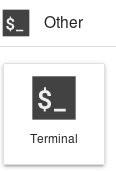

Try to change the number of THREADS with `export OMP_NUM_THREADS=4` You do not need tocompile the program again.  

```
cd ./openmp
gcc -o omp_helloc -fopenmp omp_hello.c
export OMP_NUM_THREADS=4
./omp_helloc
```

In [5]:
# Check if the executable was created
if os.path.exists(executable_name):
    print(f"Compilation successful, executable '{executable_name}' created.")
    
    # Set the number of threads for OpenMP
    os.environ["OMP_NUM_THREADS"] = "4"
    print("OMP_NUM_THREADS set to 4.")
    
    # Run the compiled executable
    run_command = f"./{executable_name}"
    run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)
    
    # Print the output and error (if any) after running the executable
    print("Running the program...")
    if run_process.stdout:
        print("Output:", run_process.stdout)
    if run_process.stderr:
        print("Error:", run_process.stderr)
else:
    print("Compilation failed.")

Compilation successful, executable 'omp_helloc' created.
OMP_NUM_THREADS set to 4.
Running the program...
Output: Hello World! from thread = 0
Number of threads = 4
Hello World! from thread = 3
Hello World! from thread = 2
Hello World! from thread = 1



## OpenMP reduction

The reduction clauses are data-sharing attribute clauses that can be used to perform some forms of recurrence calculations in parallel.

### Example - Array Addition with OpenMP parallel programming

Let's now try to understand how to parallelize a simple for loop using OpenMP. For example, we want to sum-up all the numbers from 1-12, but using 3 threads in parallel. Let's observe the following figure

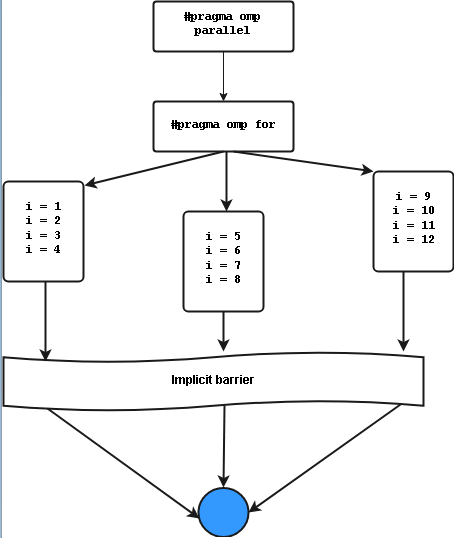

The code will be something like this:

```
#include <iostream>
#include <omp.h>
#include <cmath>

int main(){
    double sum_i = 0;
    #pragma omp parallel for reduction(+:sum_i)
    for (int i=0; i<12; i++){
        sum_i += i;
       
    }
    std::cout << "Sum = " << sum_i << std::endl;
    return 0;
}
```

And we will compile it and run it. The previous code was C, but this is C++, so we will use the `g++` compiler, the sintax is very similar as you can see. We will pass again the option `-fopenmp` to the compiler. To tell that it should use as many threads as available cores.


In [6]:
import os
import subprocess

# Define the path for the C++ program file
cpp_program_path = "array_addition.cpp"

# Remove the existing file if it exists
if os.path.exists(cpp_program_path):
    os.remove(cpp_program_path)

# Create and write the C++ program
cpp_program = """
#include <iostream>
#include <omp.h>

int main() {
    double sum_i = 0;
    #pragma omp parallel for reduction(+:sum_i)
    for (int i = 1; i <= 12; i++) {
        sum_i += i;
        int thread_id = omp_get_thread_num();
        printf("Thread %d adding %d, partial sum: %f\\n", thread_id, i, sum_i);
    }
    std::cout << "Final Sum = " << sum_i << std::endl;
    return 0;
}
"""

# Write the C++ program to a file
with open(cpp_program_path, "w") as file:
    file.write(cpp_program)

print(f"C++ program written to {cpp_program_path}.")

# Compile the C++ program using g++ with OpenMP support
compile_command = f"g++ -o array_addition -fopenmp {cpp_program_path}"
compile_process = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

# Print the output and error (if any) after compilation attempt
print("Compiling the C++ program...")
if compile_process.stdout:
    print("Output:", compile_process.stdout)
if compile_process.stderr:
    print("Error:", compile_process.stderr)

# Check if the executable was created
executable_path = "array_addition"
if os.path.exists(executable_path):
    print("Compilation successful, executable created.")
else:
    print("Compilation failed.")

# Run the compiled program
run_command = f"./{executable_path}"
run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)

# Print the output of the program execution
print("Running the C++ program...")
if run_process.stdout:
    print("Program Output:\n", run_process.stdout)
if run_process.stderr:
    print("Program Error:\n", run_process.stderr)


C++ program written to array_addition.cpp.
Compiling the C++ program...
Compilation successful, executable created.
Running the C++ program...
Program Output:
 Thread 0 adding 1, partial sum: 1.000000
Thread 0 adding 2, partial sum: 3.000000
Thread 0 adding 3, partial sum: 6.000000
Thread 3 adding 10, partial sum: 10.000000
Thread 3 adding 11, partial sum: 21.000000
Thread 3 adding 12, partial sum: 33.000000
Thread 2 adding 7, partial sum: 7.000000
Thread 2 adding 8, partial sum: 15.000000
Thread 2 adding 9, partial sum: 24.000000
Thread 1 adding 4, partial sum: 4.000000
Thread 1 adding 5, partial sum: 9.000000
Thread 1 adding 6, partial sum: 15.000000
Final Sum = 78



### Array Addition with OpenMP

In this C++ program, we utilize the `#pragma omp parallel for reduction(+:sum_i)` directive to parallelize the summation of numbers from 1 to 12.

- **Parallelization:** The loop that sums up the numbers is parallelized using OpenMP. The `reduction(+:sum_i)` clause ensures that each thread computes its partial sum independently and then combines these partial sums into a final result.

- **Thread Execution:** Each thread is responsible for adding a subset of the numbers. The program prints which thread is processing which number and shows the partial sum being calculated.

- **Output:** After the loop completes, the program outputs the final sum, which should be the sum of numbers from 1 to 12.

By using multiple threads, the program demonstrates how OpenMP can efficiently parallelize operations that involve accumulation, reducing the overall computation time in more complex scenarios.


You can run it direclty:

```
cd ./openmp
g++ -o array_addition array_addition.cpp -fopenmp
./array_addition
```

You can modify the C++ source code of the program and see the result after compiling it. 

For example, would you like to see the thread id of each thread, what would you change?

    int tid;
    #pragma omp parallel for reduction(+:sum_i)
    for (int i=0; i<12; i++){
        sum_i += i;
        tid = omp_get_thread_num();
        printf("threadid = %d\n", tid);   
        



## OpenMP Sections

The `omp sections` directive in OpenMP allows different code blocks to be executed in parallel by separate threads. This is particularly useful when you have multiple independent tasks that can be run concurrently, each performing a different operation.

### Example: Parallel Tasks with OpenMP Sections

In this example, we will create a C++ program where different sections of code (each performing a distinct task) are executed in parallel using OpenMP. Each section will perform a specific calculation and print which thread is executing it.


In [7]:
import os
import subprocess

# Define the path for the C++ program file
cpp_program_path = "omp_sections_example.cpp"

# Remove the existing file if it exists
if os.path.exists(cpp_program_path):
    os.remove(cpp_program_path)

# Create and write the C++ program
cpp_program = """
#include <iostream>
#include <omp.h>

void task1() {
    printf("Task 1 is being executed by thread %d\\n", omp_get_thread_num());
}

void task2() {
    printf("Task 2 is being executed by thread %d\\n", omp_get_thread_num());
}

void task3() {
    printf("Task 3 is being executed by thread %d\\n", omp_get_thread_num());
}

int main() {
    #pragma omp parallel sections
    {
        #pragma omp section
        {
            task1();
        }

        #pragma omp section
        {
            task2();
        }

        #pragma omp section
        {
            task3();
        }
    }
    return 0;
}
"""

# Write the C++ program to a file
with open(cpp_program_path, "w") as file:
    file.write(cpp_program)

print(f"C++ program written to {cpp_program_path}.")

# Compile the C++ program using g++ with OpenMP support
compile_command = f"g++ -o omp_sections_example -fopenmp {cpp_program_path}"
compile_process = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

# Print the output and error (if any) after compilation attempt
print("Compiling the C++ program...")
if compile_process.stdout:
    print("Output:", compile_process.stdout)
if compile_process.stderr:
    print("Error:", compile_process.stderr)

# Check if the executable was created
executable_path = "omp_sections_example"
if os.path.exists(executable_path):
    print("Compilation successful, executable created.")
else:
    print("Compilation failed.")

# Run the compiled program
run_command = f"./{executable_path}"
run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)

# Print the output of the program execution
print("Running the C++ program...")
if run_process.stdout:
    print("Program Output:\n", run_process.stdout)
if run_process.stderr:
    print("Program Error:\n", run_process.stderr)


C++ program written to omp_sections_example.cpp.
Compiling the C++ program...
Compilation successful, executable created.
Running the C++ program...
Program Output:
 Task 1 is being executed by thread 0
Task 2 is being executed by thread 0
Task 3 is being executed by thread 0




### Parallel Tasks with OpenMP Sections

In this C++ program, we use the `#pragma omp parallel sections` directive to run different tasks concurrently. Each section in the program is executed by a different thread.

- **Sections Directive:** The `#pragma omp sections` directive tells OpenMP to execute the enclosed code blocks in parallel. Each `#pragma omp section` defines a block of code that will run in a separate thread.

- **Tasks:** The program defines three tasks (`task1`, `task2`, and `task3`), each of which prints the thread number that is executing it. This helps in understanding how different sections of the code are handled by different threads.

- **Parallel Execution:** When the program is run, you will see that the tasks are executed in parallel by different threads. The output will show which thread is handling each task.

### Benefits of Using OpenMP Sections

Using `omp sections` is beneficial when you have multiple independent tasks that can be executed simultaneously. This approach can significantly reduce the overall execution time in scenarios where tasks are computationally intensive but independent of each other.

By running the example, you will observe the parallel execution of different tasks, demonstrating the power and flexibility of OpenMP for parallel programming.


## OpenMP Barriers

The `omp barrier` directive in OpenMP is used to synchronize threads. When a barrier is encountered, all threads in a team must reach the barrier before any can proceed. This ensures that certain sections of the code are executed by all threads up to a certain point before moving forward.

### Example: Synchronization with OpenMP Barriers

In this example, we will create a C++ program where multiple threads perform some tasks in parallel, but they need to synchronize at certain points to ensure the correctness of the program. The `omp barrier` directive will be used to synchronize the threads.


In [8]:
import os
import subprocess

# Define the path for the C++ program file
cpp_program_path = "omp_barrier_example.cpp"

# Remove the existing file if it exists
if os.path.exists(cpp_program_path):
    os.remove(cpp_program_path)

# Create and write the C++ program
cpp_program = """
#include <iostream>
#include <omp.h>

int main() {
    int num_threads = 0;

    #pragma omp parallel
    {
        int thread_id = omp_get_thread_num();
        
        // Each thread performs this task
        printf("Thread %d: Performing initial task...\\n", thread_id);
        
        // Synchronize threads at this point
        #pragma omp barrier
        
        // Only after all threads reach this barrier, they perform the next task
        printf("Thread %d: Performing task after barrier...\\n", thread_id);
        
        // Synchronize threads again
        #pragma omp barrier
        
        // Final task after the second barrier
        printf("Thread %d: Performing final task...\\n", thread_id);

        // Update the number of threads used (only by one thread to avoid race conditions)
        #pragma omp single
        {
            num_threads = omp_get_num_threads();
        }
    }
    
    printf("Total number of threads used: %d\\n", num_threads);
    return 0;
}
"""

# Write the C++ program to a file
with open(cpp_program_path, "w") as file:
    file.write(cpp_program)

print(f"C++ program written to {cpp_program_path}.")

# Compile the C++ program using g++ with OpenMP support
compile_command = f"g++ -o omp_barrier_example -fopenmp {cpp_program_path}"
compile_process = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

# Print the output and error (if any) after compilation attempt
print("Compiling the C++ program...")
if compile_process.stdout:
    print("Output:", compile_process.stdout)
if compile_process.stderr:
    print("Error:", compile_process.stderr)

# Check if the executable was created
executable_path = "omp_barrier_example"
if os.path.exists(executable_path):
    print("Compilation successful, executable created.")
else:
    print("Compilation failed.")

# Run the compiled program
run_command = f"./{executable_path}"
run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)

# Print the output of the program execution
print("Running the C++ program...")
if run_process.stdout:
    print("Program Output:\n", run_process.stdout)
if run_process.stderr:
    print("Program Error:\n", run_process.stderr)


C++ program written to omp_barrier_example.cpp.
Compiling the C++ program...
Compilation successful, executable created.
Running the C++ program...
Program Output:
 Thread 0: Performing initial task...
Thread 3: Performing initial task...
Thread 2: Performing initial task...
Thread 1: Performing initial task...
Thread 0: Performing task after barrier...
Thread 3: Performing task after barrier...
Thread 2: Performing task after barrier...
Thread 1: Performing task after barrier...
Thread 0: Performing final task...
Thread 3: Performing final task...
Thread 2: Performing final task...
Thread 1: Performing final task...
Total number of threads used: 4




### Synchronization with OpenMP Barriers

In this C++ program, we use the `#pragma omp barrier` directive to synchronize threads at specific points in the code.

- **Parallel Region:** The `#pragma omp parallel` directive creates a team of threads. Each thread executes the code within the parallel region.

- **Initial Task:** Each thread performs an initial task, such as printing a message indicating its thread ID.

- **First Barrier:** After the initial task, we use `#pragma omp barrier` to ensure that all threads reach this point before any thread can proceed to the next section of the code. This synchronization is crucial in scenarios where subsequent tasks depend on the completion of previous tasks by all threads.

- **Second Task:** Once all threads have reached the first barrier, they proceed to the next task, which is again synchronized using a barrier.

- **Final Task:** After the second barrier, the threads perform their final tasks.

- **Single Directive:** The `#pragma omp single` directive ensures that only one thread updates the `num_threads` variable to avoid race conditions. This demonstrates how you can control access to shared resources in parallel regions.

### Benefits of Using OpenMP Barriers

The `omp barrier` directive is essential when you need to ensure that all threads have completed a certain portion of the code before moving forward. This is common in parallel algorithms where steps are dependent on the completion of previous steps by all threads.

By running the example, you will observe how threads synchronize their execution using barriers, which is a key aspect of ensuring correctness in parallel programs.


# Image Processing with OpenMP

Image processing is a computationally intensive task that can benefit significantly from parallelization. Convolution operations, which apply a filter or kernel to an image, are particularly well-suited for parallel execution due to their repetitive nature and localized data dependencies.

In this example, we focus on parallelizing convolution operations using OpenMP to improve performance. Convolution is commonly used for tasks like edge detection, blurring, and sharpening in digital images.

By using the `#pragma omp parallel for` directive with `collapse(2)`, the nested loops for iterating over the image are collapsed into a single parallel loop. This allows the workload to be distributed evenly across multiple threads, resulting in significant speedup, especially on systems with many cores. Performance improvements can be measured by comparing execution time with and without parallelization, using a tool like Intel VTune or GNU time.


In [9]:
import os
import subprocess
import time

# Define the path for the C program file
c_program_path = "image_processing_openmp.c"

# Remove the existing file if it exists
if os.path.exists(c_program_path):
    os.remove(c_program_path)

# Create and write the C program
c_program = """
#include <omp.h>
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define WIDTH 1920
#define HEIGHT 1080
#define KERNEL_SIZE 3

void apply_convolution(double **image, double **output, double kernel[KERNEL_SIZE][KERNEL_SIZE]) {
    #pragma omp parallel for collapse(2)
    for (int y = 1; y < HEIGHT - 1; y++) {
        for (int x = 1; x < WIDTH - 1; x++) {
            double sum = 0.0;
            for (int ky = 0; ky < KERNEL_SIZE; ky++) {
                for (int kx = 0; kx < KERNEL_SIZE; kx++) {
                    int ix = x + kx - 1;
                    int iy = y + ky - 1;
                    sum += image[iy][ix] * kernel[ky][kx];
                }
            }
            output[y][x] = sum;
        }
    }
}

void apply_convolution_serial(double **image, double **output, double kernel[KERNEL_SIZE][KERNEL_SIZE]) {
    for (int y = 1; y < HEIGHT - 1; y++) {
        for (int x = 1; x < WIDTH - 1; x++) {
            double sum = 0.0;
            for (int ky = 0; ky < KERNEL_SIZE; ky++) {
                for (int kx = 0; kx < KERNEL_SIZE; kx++) {
                    int ix = x + kx - 1;
                    int iy = y + ky - 1;
                    sum += image[iy][ix] * kernel[ky][kx];
                }
            }
            output[y][x] = sum;
        }
    }
}

void print_image_section(double **image, int start_x, int start_y, int size) {
    printf("Image Section:\\n");
    for (int y = start_y; y < start_y + size; y++) {
        for (int x = start_x; x < start_x + size; x++) {
            printf("%6.1f ", image[y][x]);
        }
        printf("\\n");
    }
}

void print_output_section(double **output, int start_x, int start_y, int size) {
    printf("Output Section:\\n");
    for (int y = start_y; y < start_y + size; y++) {
        for (int x = start_x; x < start_x + size; x++) {
            printf("%6.1f ", output[y][x]);
        }
        printf("\\n");
    }
}

int main() {
    // Dynamically allocate memory for images
    double **image = malloc(HEIGHT * sizeof(double *));
    double **output_parallel = malloc(HEIGHT * sizeof(double *));
    double **output_serial = malloc(HEIGHT * sizeof(double *));
    for (int i = 0; i < HEIGHT; i++) {
        image[i] = malloc(WIDTH * sizeof(double));
        output_parallel[i] = malloc(WIDTH * sizeof(double));
        output_serial[i] = malloc(WIDTH * sizeof(double));
    }

    double kernel[KERNEL_SIZE][KERNEL_SIZE] = {
        {0, -1, 0},
        {-1, 4, -1},
        {0, -1, 0}
    };

    // Seed the random number generator for reproducibility
    srand(42);

    // Initialize image with random values
    for (int y = 0; y < HEIGHT; y++) {
        for (int x = 0; x < WIDTH; x++) {
            image[y][x] = rand() % 256;
        }
    }

    // Apply parallel convolution
    double start_time_parallel = omp_get_wtime();
    apply_convolution(image, output_parallel, kernel);
    double end_time_parallel = omp_get_wtime();

    // Apply serial convolution
    double start_time_serial = omp_get_wtime();
    apply_convolution_serial(image, output_serial, kernel);
    double end_time_serial = omp_get_wtime();

    // Print a 5x5 section of the image and output for representation
    print_image_section(image, 0, 0, 5);
    print_output_section(output_parallel, 0, 0, 5);
    print_output_section(output_serial, 0, 0, 5);

    // Compare and print the execution times
    printf("Parallel Execution Time: %f seconds\\n", end_time_parallel - start_time_parallel);
    printf("Serial Execution Time: %f seconds\\n", end_time_serial - start_time_serial);

    // Free dynamically allocated memory
    for (int i = 0; i < HEIGHT; i++) {
        free(image[i]);
        free(output_parallel[i]);
        free(output_serial[i]);
    }
    free(image);
    free(output_parallel);
    free(output_serial);

    return 0;
}
"""

# Write the C program to a file
with open(c_program_path, "w") as file:
    file.write(c_program)

print(f"C program written to {c_program_path}.")

# Compile the C program using gcc with OpenMP support
compile_command = f"gcc -o image_processing_openmp -fopenmp {c_program_path}"
compile_process = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

# Print the output and error (if any) after compilation attempt
print("Compiling the C program...")
if compile_process.stdout:
    print("Output:", compile_process.stdout)
if compile_process.stderr:
    print("Error:", compile_process.stderr)

# Check if the executable was created
executable_path = "image_processing_openmp"
if os.path.exists(executable_path):
    print("Compilation successful, executable created.")
else:
    print("Compilation failed.")

# Run the compiled program
run_command = f"./{executable_path}"
run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)

# Print the output of the program execution
print("Running the C program...")
if run_process.stdout:
    print("Program Output:\n", run_process.stdout)
if run_process.stderr:
    print("Program Error:\n", run_process.stderr)


C program written to image_processing_openmp.c.
Compiling the C program...
Compilation successful, executable created.
Running the C program...
Program Output:
 Image Section:
  70.0  100.0   49.0   41.0  100.0 
 107.0  203.0   54.0  235.0  114.0 
  29.0   78.0   69.0  144.0   87.0 
 103.0  218.0  134.0   19.0  236.0 
  26.0  130.0  172.0   70.0   32.0 
Output Section:
   0.0    0.0    0.0    0.0    0.0 
   0.0  473.0 -340.0  587.0   -3.0 
   0.0 -207.0 -134.0  166.0 -230.0 
   0.0  427.0   58.0 -508.0  690.0 
   0.0   83.0  344.0 -145.0 -402.0 
Output Section:
   0.0    0.0    0.0    0.0    0.0 
   0.0  473.0 -340.0  587.0   -3.0 
   0.0 -207.0 -134.0  166.0 -230.0 
   0.0  427.0   58.0 -508.0  690.0 
   0.0   83.0  344.0 -145.0 -402.0 
Parallel Execution Time: 0.087769 seconds
Serial Execution Time: 0.086834 seconds



0. **Writing and Compiling**:
   - The C program is written to a file named `image_processing_openmp.c`.
   - It is then compiled using the `gcc` compiler with OpenMP support enabled (`-fopenmp`).

1. **Parallelizing Convolution**:
   - The convolution operation is parallelized using OpenMP. The `#pragma omp parallel for collapse(2)` directive is used to parallelize the nested loops. This allows for efficient utilization of multiple CPU cores by distributing the work of applying the kernel across multiple threads.

2. **Memory Allocation**:
   - The image and output arrays are dynamically allocated to handle large image sizes typical in high-resolution images (e.g., 1920x1080). This ensures the program can handle varying image sizes without hardcoding limits.

3. **Random Image Initialization**:
   - For demonstration purposes, the image is filled with random values. This simulates a real-world scenario where image data would be processed.

4. **Kernel Definition**:
   - A simple 3x3 kernel is used in this example for edge detection. The kernel values can be modified to apply different filters (e.g., blurring, sharpening).


# Financial Analytics with OpenMP

Financial analytics often involve complex simulations that require significant computational power. Monte Carlo simulations, which are used to model the probability of different outcomes in financial markets, are a prime example. These simulations rely on repeated random sampling to calculate results, making them highly parallelizable.

In this notebook, we demonstrate how OpenMP can be used to parallelize Monte Carlo simulations, improving efficiency and enabling faster data analysis. By leveraging multiple threads, we can significantly reduce the time taken to perform large-scale simulations.


In [12]:
import os
import subprocess

# Define the path for the C program file
c_program_path = "monte_carlo_openmp.c"

# Remove the existing file if it exists
if os.path.exists(c_program_path):
    os.remove(c_program_path)

# Create and write the C program
c_program = """
#include <omp.h>
#include <stdio.h>
#include <stdlib.h>
#include <math.h>

#define NUM_SIMULATIONS 1000000  // Number of Monte Carlo simulations
#define MAX_THREADS 8            // Maximum number of OpenMP threads

// Function to generate a normally distributed random number using Box-Muller transform
double rand_normal() {
    double u = (double)rand() / RAND_MAX;
    double v = (double)rand() / RAND_MAX;
    return sqrt(-2.0 * log(u)) * cos(2.0 * M_PI * v);
}

// Monte Carlo simulation for European call option pricing
double monte_carlo_option_pricing(int seed, double S, double K, double r, double sigma, double T) {
    srand(seed);
    double z = rand_normal();
    double S_T = S * exp((r - 0.5 * sigma * sigma) * T + sigma * sqrt(T) * z);  // Simulate final stock price
    double payoff = fmax(0.0, S_T - K);  // Payoff of the European call option
    return payoff;
}

int main() {
    double S = 100.0;    // Initial stock price
    double K = 100.0;    // Strike price
    double r = 0.05;     // Risk-free interest rate
    double sigma = 0.2;  // Volatility
    double T = 1.0;      // Time to maturity (1 year)

    for (int num_threads = 1; num_threads <= MAX_THREADS; num_threads++) {
        double sum = 0.0;
        double start_time = omp_get_wtime();

        #pragma omp parallel for num_threads(num_threads) reduction(+:sum)
        for (int i = 0; i < NUM_SIMULATIONS; i++) {
            double payoff = monte_carlo_option_pricing(i, S, K, r, sigma, T);
            sum += payoff;
        }

        double option_price = (sum / NUM_SIMULATIONS) * exp(-r * T);  // Discounted expected payoff
        double end_time = omp_get_wtime();

        printf("Threads: %d, Estimated Option Price: %f, Execution Time: %f seconds\\n", num_threads, option_price, end_time - start_time);
    }

    return 0;
}
"""

# Write the C program to a file
with open(c_program_path, "w") as file:
    file.write(c_program)

print(f"C program written to {c_program_path}.")

# Compile the C program using gcc with OpenMP and math library support
compile_command = f"gcc -o monte_carlo_openmp -fopenmp {c_program_path} -lm"
compile_process = subprocess.run(compile_command, shell=True, capture_output=True, text=True)

# Print the output and error (if any) after compilation attempt
print("Compiling the C program...")
if compile_process.stdout:
    print("Output:", compile_process.stdout)
if compile_process.stderr:
    print("Error:", compile_process.stderr)

# Check if the executable was created
executable_path = "monte_carlo_openmp"
if os.path.exists(executable_path):
    print("Compilation successful, executable created.")
else:
    print("Compilation failed.")

# Run the compiled program
run_command = f"./{executable_path}"
run_process = subprocess.run(run_command, shell=True, capture_output=True, text=True)

# Print the output of the program execution
print("Running the C program...")
if run_process.stdout:
    print("Program Output:\n", run_process.stdout)
if run_process.stderr:
    print("Program Error:\n", run_process.stderr)


C program written to monte_carlo_openmp.c.
Compiling the C program...
Compilation successful, executable created.
Running the C program...
Program Output:
 Threads: 1, Estimated Option Price: 10.462102, Execution Time: 1.159452 seconds
Threads: 2, Estimated Option Price: 10.462223, Execution Time: 1.168060 seconds
Threads: 3, Estimated Option Price: 10.462024, Execution Time: 1.167078 seconds
Threads: 4, Estimated Option Price: 10.462104, Execution Time: 1.174924 seconds
Threads: 5, Estimated Option Price: 10.462031, Execution Time: 1.168560 seconds
Threads: 6, Estimated Option Price: 10.462172, Execution Time: 1.172370 seconds
Threads: 7, Estimated Option Price: 10.462162, Execution Time: 1.168552 seconds
Threads: 8, Estimated Option Price: 10.461900, Execution Time: 1.171045 seconds



### Monte Carlo Simulation for Option Pricing with OpenMP

In this program, we use Monte Carlo simulations to estimate the price of a European call option, a common financial derivative. The option price is determined by simulating random stock price paths and calculating the option's payoff based on those simulations. The simulation is parallelized using OpenMP to speed up computation.

#### Key Components:

- **Monte Carlo Simulation for Option Pricing:**
  - The program simulates the evolution of a stock's price using a stochastic model (the Black-Scholes model), where the stock price at maturity (`S_T`) is influenced by random factors. The payoff of the option is calculated as `max(0, S_T - K)`, where `K` is the strike price.
  - The expected payoff from multiple simulations is then discounted back to the present value using the risk-free interest rate to estimate the option price.

- **Parallelization with OpenMP:**
  - The program is parallelized using the `#pragma omp parallel for` directive. This allows the simulations to run concurrently on multiple threads. The `reduction(+:sum)` clause ensures that the payoffs computed by each thread are safely accumulated into the `sum` variable.
  - The program scales from 1 to 8 threads, allowing you to observe the performance gains from parallel execution.

- **Thread Scaling and Performance:**
  - The program runs the simulation with varying numbers of threads (from 1 to 8) to demonstrate how parallelization affects execution time. By comparing the execution time for different thread counts, we can measure the impact of parallel computing on the performance of large-scale simulations.
  - The more threads that are used, the faster the program can complete the simulations, as the workload is distributed across the available CPU cores.

- **Time Measurement:**
  - The execution time for each configuration (1 to 8 threads) is measured using `omp_get_wtime()`. This helps demonstrate how efficiently the workload is distributed across threads and the resulting reduction in computation time.

#### Output:
- For each number of threads, the program prints:
  - **Estimated Option Price**: The calculated option price based on the Monte Carlo simulation.
  - **Execution Time**: The time taken to complete the simulation with the given number of threads.

By running this program, you can see how using multiple threads with OpenMP speeds up the Monte Carlo simulation and how it impacts the overall time to estimate the option price. This illustrates the power of parallel computing in financial analytics, where quick computations are crucial for making timely decisions.


### Understanding How OpenMP Works on Individual Nodes

OpenMP (Open Multi-Processing) is a parallel programming model designed for shared memory architectures. It allows you to parallelize tasks across multiple threads on a single node (machine), making it ideal for multi-core processors, such as those found in most modern laptops and desktops.

#### Key Concepts:
- **Shared Memory Parallelism**: OpenMP operates within a shared memory space, meaning all threads in the program can access the same memory. This makes OpenMP a great tool for parallelizing tasks within a single node, such as your personal laptop or a single server.
  
- **Multi-Core Utilization**: Modern laptops and desktops typically have multiple cores (e.g., 4, 8, or more). OpenMP can take advantage of these cores to run multiple threads in parallel, speeding up computations that would otherwise run sequentially.

#### How OpenMP Works on Your Laptop:
When you run an OpenMP program on your laptop, the program will create multiple threads that execute concurrently across the available CPU cores. For example, if your laptop has 4 cores, you can instruct OpenMP to run 4 threads, one per core, to divide the workload and perform tasks simultaneously. OpenMP is built into most C/C++ and Fortran compilers (e.g., GCC), making it easy to set up and use on local machines.

#### Getting Started with OpenMP on Your Laptop:
1. **Installing a Compiler with OpenMP Support**:
   - OpenMP is supported by many compilers, such as GCC, which is available on Linux, macOS, and Windows (via MinGW or WSL).
   - To install GCC:
     - On **Linux**: Run `sudo apt-get install gcc` (for Ubuntu) or the equivalent package manager command.
     - On **macOS**: You can install GCC with Homebrew by running `brew install gcc`.
     - On **Windows**: Use MinGW or Windows Subsystem for Linux (WSL) and install GCC.

2. **Compiling an OpenMP Program**:
   - To compile a C program that uses OpenMP, simply add the `-fopenmp` flag to the GCC compiler command:
     ```bash
     gcc -fopenmp -o program_name program_name.c
     ```
   - This flag enables OpenMP support in the program and allows the code to run across multiple threads.

3. **Running OpenMP Programs**:
   - Once compiled, you can run your OpenMP program on your laptop. By default, OpenMP will try to use all available cores, but you can control the number of threads by setting the environment variable `OMP_NUM_THREADS`:
     ```bash
     export OMP_NUM_THREADS=4  # Use 4 threads
     ./program_name
     ```

#### Why Start with OpenMP on Your Laptop?
OpenMP is a great way to get started with parallel programming because:
- **Ease of Use**: It's simple to integrate OpenMP into existing C/C++ code with minimal modifications.
- **Immediate Benefits**: Even on a small scale (like a laptop with 4-8 cores), you can observe performance improvements in computationally intensive tasks.
- **Scalability**: Once you understand how OpenMP works on a laptop, you can easily scale your knowledge to more powerful systems like high-performance computing (HPC) clusters.

By practicing on your laptop, you can gain hands-on experience with parallel programming and experiment with how OpenMP improves performance for various tasks, including scientific simulations, data processing, and more.


This is the end of the practice.